# Functional API
- Sequential 모델은 각 Layer들의 입력과 출력이 하나라고 가정한다. 그리고 각각의 Layer(입력층, 은닉층, 출력층)들을 차례대로 쌓아 구성한다.
- 함수형 API를 사용하면 **다중입력, 다중출력, 그래프 형태**의 다양한 형태의 모델을 유연하게 구성할 수 있다.

- Functional API는 직접 텐서들의 입출력을 다룬다. 
- 함수호출 처럼 Layer를 이용하여 텐서를 입력 받고 출력하는 형식으로 모델을 구현한다.
    - 코드상에서는 Layer를 입력받는 형식으로 작성한다.


```python
input_tensor = Input(shape=(16,))
dense = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(32, activation='sigmoid')(dense)

model = models.Model(input_tensor, output_tensor)
```

In [2]:
class Test:
  def __init__(self, name):
    self.name = name

  def __call__(self): # 객체를 함수처럼 호출할 수 있게 해주는 특수메소드(매직매소드)
    print(self.name)

## Sequential, Functional API 

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

### Sequential

In [4]:
seq_model = keras.Sequential()
seq_model.add(layers.Input(shape=(32,32,3)))
seq_model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
seq_model.add(layers.Flatten())
seq_model.add(layers.Dense(units=256, activation='relu'))
seq_model.add(layers.Dense(units=10, activation='softmax'))
seq_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               16777472  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 16,781,834
Trainable params: 16,781,834
Non-trainable params: 0
_________________________________________________________________


### Functional

In [5]:
input_tensor = layers.Input(shape=(32,32,3))
conv_tensor = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(input_tensor)
pool_tensor = layers.MaxPool2D(padding='same')(conv_tensor)

flatten_tensor = layers.Flatten()(pool_tensor)

dense_tensor = layers.Dense(units=256, activation='relu')(flatten_tensor)
dense_tensor2 = layers.Dense(units=128)(dense_tensor)

bn_tensor = layers.BatchNormalization()(dense_tensor2)
relu_tensor = layers.ReLU()(bn_tensor)

output_tensor = layers.Dense(units=10, activation='softmax')(relu_tensor)

fn_model = models.Model(input_tensor, output_tensor) # (입력텐서, 출력텐서)

fn_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               4194560   
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512   

In [23]:
!pip install graphviz

In [7]:
!pip show graphviz

Name: graphviz
Version: 0.16
Summary: Simple Python interface for Graphviz
Home-page: https://github.com/xflr6/graphviz
Author: Sebastian Bank
Author-email: sebastian.bank@uni-leipzig.de
License: MIT
Location: c:\users\inje.jeong\anaconda3\envs\tf2\lib\site-packages
Requires: 
Required-by: 


In [8]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

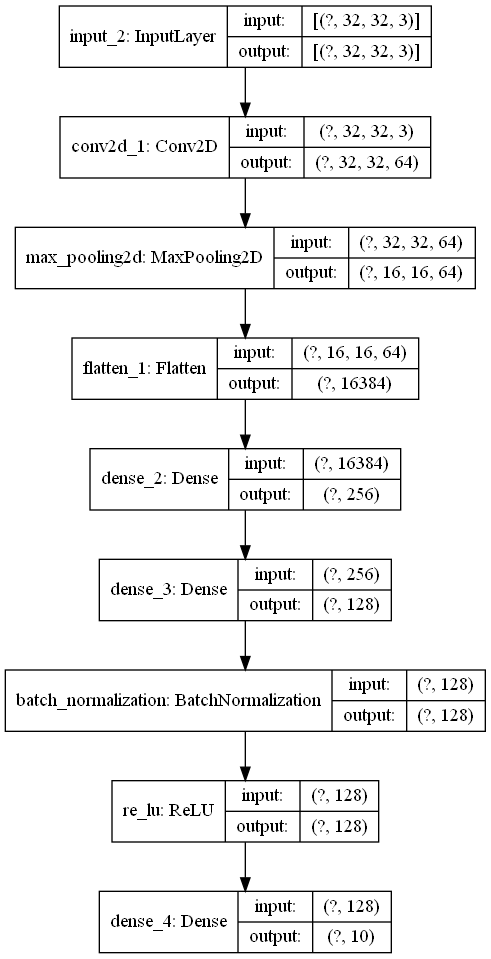

In [6]:
keras.utils.plot_model(fn_model, show_shapes=True)

In [9]:
input_tensor = layers.Input(shape=(32,32,3))
x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(input_tensor)
x = layers.MaxPool2D(padding='same')(x)
x = layers.Flatten()(x)

x = layers.Dense(units=256, activation='relu')(x)
x = layers.Dense(units=128)(x)

x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

output_tensor = layers.Dense(units=10, activation='softmax')(x)

fn_model = models.Model(input_tensor, output_tensor) # (입력텐서, 출력텐서)

fn_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               4194560   
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512 

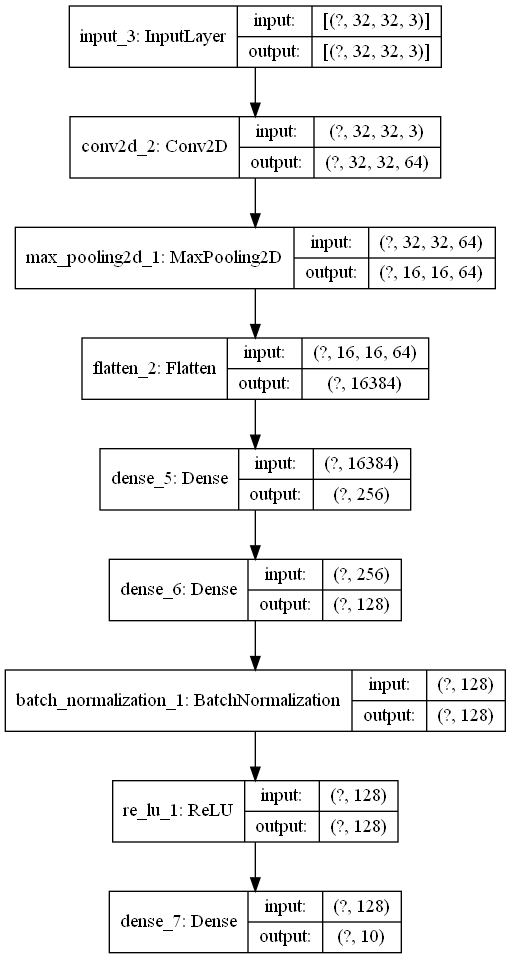

In [26]:
keras.utils.plot_model(fn_model, show_shapes=True)

## 레이어를 합치는 함수
- concatenate(list, axis=-1)
    - 레이어들을 합친다
    - list: 합칠 레이어들을 리스트에 묶어 전달
    - axis: 합칠 기준축. (기본값: -1 : 마지막 축기준)
- add(list), substract(list), multiply(list)
    - 같은 index의 값들을 계산해서(더하기, 빼기, 곱하기) 하나의 레이어로 만든다.
    - list: 합칠 레이어들을 리스트에 묶어 전달

In [10]:
# Residual block
input_tensor = layers.Input((32,32,3))
x = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(input_tensor)
x1 = layers.Conv2D(64, kernel_size=3, padding='same')(x)
b1 = layers.BatchNormalization()(x1)
add1 = layers.add([x, b1])
r = layers.ReLU()(add1)

r_block_model = models.Model(input_tensor, r)

In [11]:
r_block_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 32, 32, 64)   1792        input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 32, 32, 64)   36928       conv2d_3[0][0]                   
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 32, 32, 64)   256         conv2d_4[0][0]                   
____________________________________________________________________________________________

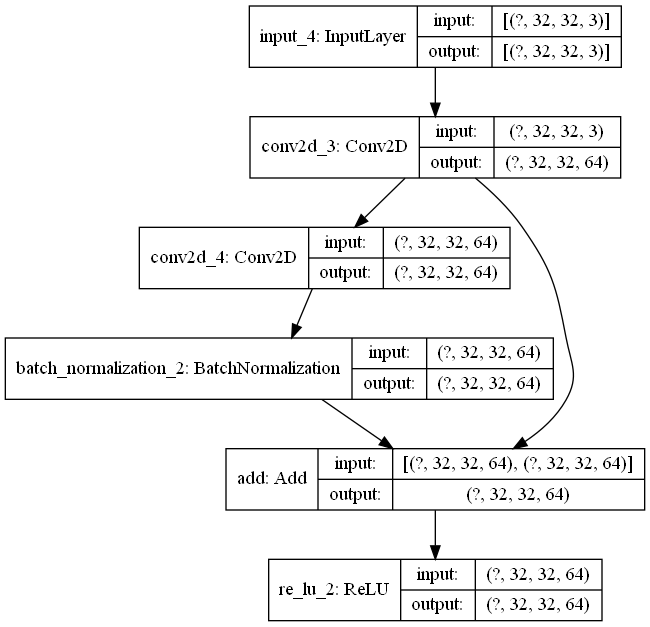

In [12]:
keras.utils.plot_model(r_block_model, show_shapes=True)

### 다중 출력 모델
- 가정
    - iris 데이터셋에서 꽃받침의 너비와 높이로 꽃잎의 너비, 높이, 꽃 종류를 예측하는 모델
    - 출력결과가 3개가 나와야 한다.
- X: 꽃받침 너비, 높이
- y: 꽃잎 너비, 높이, 꽃 종류

In [13]:
!pip show scikit-learn

Name: scikit-learn
Version: 0.23.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: c:\users\inje.jeong\anaconda3\envs\tf2\lib\site-packages
Requires: joblib, threadpoolctl, numpy, scipy
Required-by: 


In [14]:
!pip install scikit-learn

In [15]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris['data'], iris['target']
X.shape, y.shape

((150, 4), (150,))

In [16]:
y1 = X[:,2] # 꽃잎 너비
y2 = X[:,3] # 꽃잎 높이
y3 = y      # 품종

X = X[:, [0,1]]

In [17]:
X.shape, y1.shape, y2.shape, y3.shape

((150, 2), (150,), (150,), (150,))

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [40]:
input_tensor = layers.Input((2, ))
x = layers.Dense(units=16, activation='relu')(input_tensor)
x = layers.Dense(units=8, activation='relu')(x)
output1 = layers.Dense(units=1, name='petal_width_output')(x) # 꽃잎너비 예측(Regression: units=1, activation=X)
output2 = layers.Dense(units=1, name='petal_length_output')(x) # 꽃잎높이 예측(Regression: units=1, activation=X)
# 품종 예측(다중분류: unist:class개수(3), activation='softmax')
output3 = layers.Dense(units=3, activation='softmax', name='species_output')(x)

# Model(input, output) # input or output이 여러 개인 경우 리스트로 묶어 전달
model1 = models.Model(input_tensor, [output1, output2, output3])

In [41]:
model1.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_23 (Dense)                (None, 16)           48          input_18[0][0]                   
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 8)            136         dense_23[0][0]                   
__________________________________________________________________________________________________
petal_width_output (Dense)      (None, 1)            9           dense_24[0][0]                   
____________________________________________________________________________________________

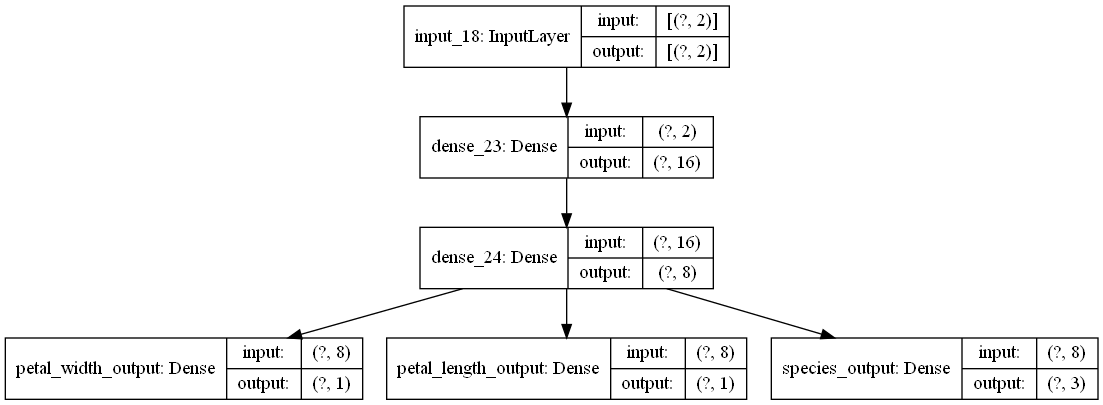

In [43]:
keras.utils.plot_model(model1, show_shapes=True)

In [47]:
# compile
model1.compile(optimizer='adam',
             loss=['mse','mse','sparse_categorical_crossentropy'])
# 출력이 3개 - 각각의 순서대로 loss를 리스트로 묶어 전달
# 역전파를 통해 weight를 업데이트할 때는 모든 loss를 더한 뒤 총 loss값으로 역전파

In [48]:
history = model1.fit(X,
                   [y1,y2,y3],
                   epochs=100,
                   validation_split=0.1)

Train on 135 samples, validate on 15 samples
Epoch 1/100
135/135 [==============================] - 1s 5ms/sample - loss: 18.6344 - petal_width_output_loss: 16.2813 - petal_length_output_loss: 0.7880 - species_output_loss: 1.1986 - val_loss: 30.9741 - val_petal_width_output_loss: 28.1940 - val_petal_length_output_loss: 2.0363 - val_species_output_loss: 0.7439
Epoch 2/100
135/135 [==============================] - 0s 87us/sample - loss: 16.6870 - petal_width_output_loss: 14.1187 - petal_length_output_loss: 0.7228 - species_output_loss: 1.2031 - val_loss: 28.3645 - val_petal_width_output_loss: 25.7945 - val_petal_length_output_loss: 1.9028 - val_species_output_loss: 0.6673
Epoch 3/100
135/135 [==============================] - 0s 80us/sample - loss: 15.3796 - petal_width_output_loss: 12.8159 - petal_length_output_loss: 0.6849 - species_output_loss: 1.2595 - val_loss: 26.2910 - val_petal_width_output_loss: 23.8825 - val_petal_length_output_loss: 1.8213 - val_species_output_loss: 0.5872
Ep

Epoch 27/100
135/135 [==============================] - 0s 87us/sample - loss: 4.3907 - petal_width_output_loss: 2.6788 - petal_length_output_loss: 0.5366 - species_output_loss: 1.2178 - val_loss: 3.9731 - val_petal_width_output_loss: 2.0028 - val_petal_length_output_loss: 1.0751 - val_species_output_loss: 0.8953
Epoch 28/100
135/135 [==============================] - 0s 87us/sample - loss: 4.3607 - petal_width_output_loss: 2.4688 - petal_length_output_loss: 0.4998 - species_output_loss: 1.2511 - val_loss: 3.9729 - val_petal_width_output_loss: 2.0058 - val_petal_length_output_loss: 1.0585 - val_species_output_loss: 0.9085
Epoch 29/100
135/135 [==============================] - 0s 87us/sample - loss: 4.3322 - petal_width_output_loss: 2.5620 - petal_length_output_loss: 0.5176 - species_output_loss: 1.2121 - val_loss: 3.9611 - val_petal_width_output_loss: 2.0027 - val_petal_length_output_loss: 1.0379 - val_species_output_loss: 0.9205
Epoch 30/100
135/135 [==============================] -

135/135 [==============================] - 0s 87us/sample - loss: 3.8196 - petal_width_output_loss: 2.3015 - petal_length_output_loss: 0.5195 - species_output_loss: 1.0952 - val_loss: 4.0503 - val_petal_width_output_loss: 1.9002 - val_petal_length_output_loss: 0.9196 - val_species_output_loss: 1.2306
Epoch 54/100
135/135 [==============================] - 0s 87us/sample - loss: 3.7989 - petal_width_output_loss: 2.1338 - petal_length_output_loss: 0.4756 - species_output_loss: 1.0968 - val_loss: 4.1262 - val_petal_width_output_loss: 1.9501 - val_petal_length_output_loss: 0.9373 - val_species_output_loss: 1.2388
Epoch 55/100
135/135 [==============================] - 0s 87us/sample - loss: 3.7804 - petal_width_output_loss: 2.1620 - petal_length_output_loss: 0.4876 - species_output_loss: 1.1106 - val_loss: 4.1380 - val_petal_width_output_loss: 1.9470 - val_petal_length_output_loss: 0.9427 - val_species_output_loss: 1.2483
Epoch 56/100
135/135 [==============================] - 0s 94us/samp

135/135 [==============================] - 0s 87us/sample - loss: 3.3397 - petal_width_output_loss: 1.7425 - petal_length_output_loss: 0.4477 - species_output_loss: 1.1063 - val_loss: 3.8593 - val_petal_width_output_loss: 1.7115 - val_petal_length_output_loss: 0.8849 - val_species_output_loss: 1.2628
Epoch 80/100
135/135 [==============================] - 0s 87us/sample - loss: 3.3207 - petal_width_output_loss: 1.6328 - petal_length_output_loss: 0.4537 - species_output_loss: 1.0989 - val_loss: 3.7752 - val_petal_width_output_loss: 1.6340 - val_petal_length_output_loss: 0.8722 - val_species_output_loss: 1.2690
Epoch 81/100
135/135 [==============================] - 0s 79us/sample - loss: 3.2994 - petal_width_output_loss: 1.6791 - petal_length_output_loss: 0.4500 - species_output_loss: 1.0965 - val_loss: 3.7076 - val_petal_width_output_loss: 1.5739 - val_petal_length_output_loss: 0.8600 - val_species_output_loss: 1.2737
Epoch 82/100
135/135 [==============================] - 0s 87us/samp

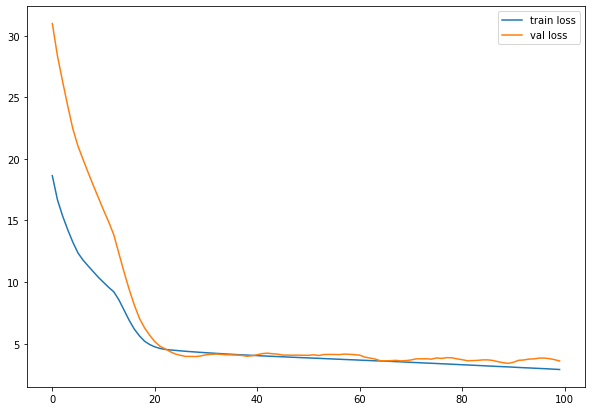

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')

plt.legend()
plt.show()

In [50]:
model1.evaluate(X, [y1, y2, y3]) 
# [총로스, output1 loss, output2 loss, output3 loss]

150/150 [==============================] - 0s 39us/sample - loss: 2.9654 - petal_width_output_loss: 1.3926 - petal_length_output_loss: 0.4761 - species_output_loss: 1.1320


[2.965394115447998, 1.3925817, 0.47610942, 1.1319993]

In [51]:
# 추론
model1.predict(X[:2])

[array([[2.986287 ],
        [2.9962955]], dtype=float32),
 array([[1.065749 ],
        [0.9893565]], dtype=float32),
 array([[0.3292894 , 0.3344108 , 0.3362998 ],
        [0.33160233, 0.36121956, 0.30717814]], dtype=float32)]

## 다중 입력 모델
- 가정 
    - IRIS 꽃 데이터 + 꽃의 사진을 입력해서 꽃의 종류를 예측한다.
- X: 꽃 데이터, 꽃 사진
- y: 꽃 종류

In [52]:
iris_info_tensor = layers.Input((4, ))
x1 = layers.Dense(32, activation='relu')(iris_info_tensor)
x1 = layers.Dense(16, activation='relu')(x1)

iris_img_tensor = layers.Input((16,16,1))
x2 = layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(iris_img_tensor)
x2 = layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x2)
x2 = layers.MaxPool2D(padding='same')(x2)

x3 = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x2)
x3 = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x3)
x3 = layers.MaxPool2D(padding='same')(x3)
x3 = layers.GlobalAveragePooling2D()(x3)

# 합치기
x4 = layers.concatenate([x1,x3])
x5 = layers.Dropout(0.2)(x4)
output_tensor = layers.Dense(units=3, activation='softmax')(x5)

model = models.Model([iris_info_tensor, iris_img_tensor], output_tensor)

In [53]:
model().summary()

TypeError: __call__() missing 1 required positional argument: 'inputs'

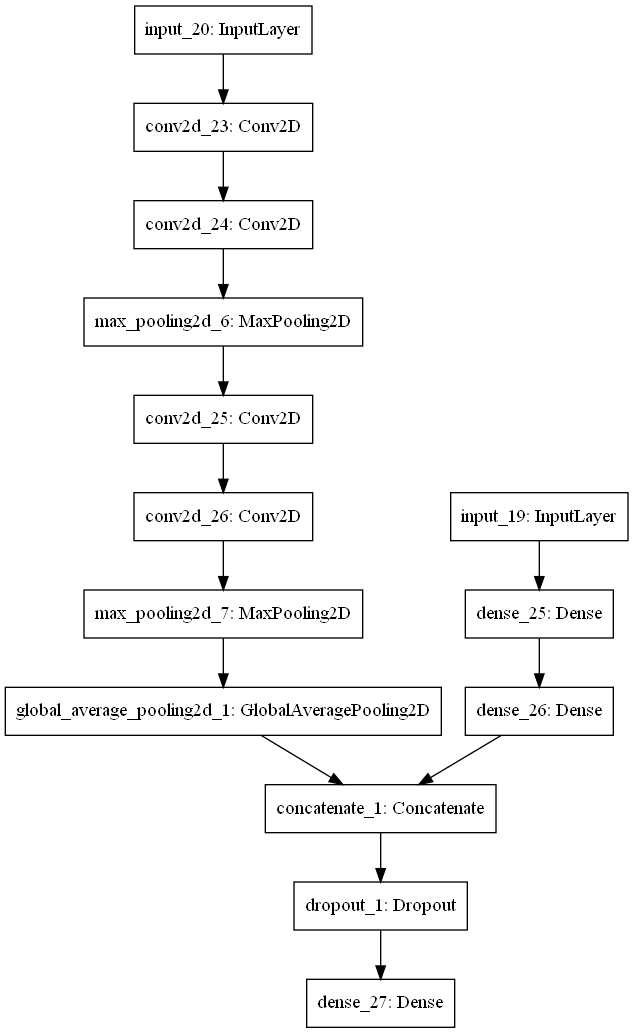

In [54]:
keras.utils.plot_model(model)

In [55]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy', metrics=['accuracy'])